In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


data = pd.read_csv("train.csv")
print(data.head())

unique_values = data['MSZoning'].unique()
print(unique_values)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### Checking if the SalePrice has any anomalies

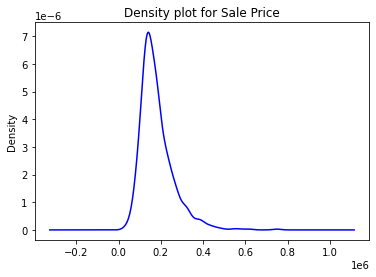

In [2]:
data.SalePrice.plot.density(color='blue') 
plt.title('Density plot for Sale Price') 
plt.show()

<AxesSubplot:xlabel='SalePrice'>

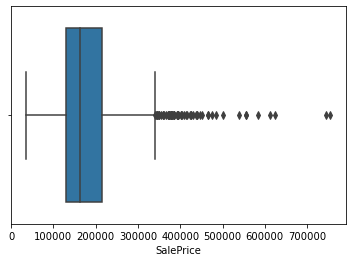

In [3]:
warnings.filterwarnings('ignore')
sns.boxplot(data.SalePrice)

Since there are a few anomalies, specifically 2 after the Sale Price of 700,000, we want to change the data, and thus we will scale the data.

But before we can start that, we have to change all the non-numerical data to numerical

# Cleaning data

## Finding how much missing data there is

In [4]:
missing_values = data.isna().sum()
percentage_missing = (missing_values / len(data)) * 100

missing_data_table = pd.DataFrame({
    'Column': missing_values.index,
    'Amount of Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

missing_data_table_sort = missing_data_table.sort_values(by='Percentage Missing', ascending=False)

print(missing_data_table_sort.head(15))


          Column  Amount of Missing Values  Percentage Missing
72        PoolQC                      1453           99.520548
74   MiscFeature                      1406           96.301370
6          Alley                      1369           93.767123
73         Fence                      1179           80.753425
57   FireplaceQu                       690           47.260274
3    LotFrontage                       259           17.739726
59   GarageYrBlt                        81            5.547945
64    GarageCond                        81            5.547945
58    GarageType                        81            5.547945
60  GarageFinish                        81            5.547945
63    GarageQual                        81            5.547945
35  BsmtFinType2                        38            2.602740
32  BsmtExposure                        38            2.602740
30      BsmtQual                        37            2.534247
31      BsmtCond                        37            2

### Dropping columns with 80%+ missing data, changing categorical to numeric and then change all NaN values to 0 for now

In [5]:
drop_cols = percentage_missing[percentage_missing > 80].index

# Filtered data
data_filtered = data.drop(columns=drop_cols)

In [6]:
# Display the columns that are not integers
no_int_cols = data.select_dtypes(exclude='int')

print(no_int_cols)

for column in no_int_cols.columns:
    unique_values = no_int_cols[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

     MSZoning  LotFrontage Street Alley LotShape LandContour Utilities  \
0          RL         65.0   Pave   NaN      Reg         Lvl    AllPub   
1          RL         80.0   Pave   NaN      Reg         Lvl    AllPub   
2          RL         68.0   Pave   NaN      IR1         Lvl    AllPub   
3          RL         60.0   Pave   NaN      IR1         Lvl    AllPub   
4          RL         84.0   Pave   NaN      IR1         Lvl    AllPub   
...       ...          ...    ...   ...      ...         ...       ...   
1455       RL         62.0   Pave   NaN      Reg         Lvl    AllPub   
1456       RL         85.0   Pave   NaN      Reg         Lvl    AllPub   
1457       RL         66.0   Pave   NaN      Reg         Lvl    AllPub   
1458       RL         68.0   Pave   NaN      Reg         Lvl    AllPub   
1459       RL         75.0   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageYrBlt GarageFinish  \
0       Inside       Gtl      CollgCr  .

Unique values for Functional:
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

Unique values for FireplaceQu:
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

Unique values for GarageType:
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

Unique values for GarageYrBlt:
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]

Unique values for GarageFinish:
['RFn' 'Unf' 'Fin' nan]

Unique values for GarageQual:
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

Unique values f

In [7]:
# Some of the datatypes are numeric
convert_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

data[convert_cols] = data[convert_cols].fillna(0)

data[convert_cols] = data[convert_cols].astype(int)

### Changes categorical to numeric

In [8]:
no_int_cols2 = data.select_dtypes(exclude='int')

for column in no_int_cols2.columns:
    # Find unique values in the column
    unique_values = no_int_cols2[column].unique()
    
    # Create a dictionary to map unique values to integers
    value_to_int_mapping = {value: index + 1 for index, value in enumerate(unique_values)}
    
    # Replace values with integers
    no_int_cols2[column] = no_int_cols2[column].map(lambda x: value_to_int_mapping.get(x, x) if pd.notna(x) else 0)

# Changes all datatypes to int
no_int_cols2 = no_int_cols2.astype(int)

for column in no_int_cols2.columns:
    unique_values = no_int_cols2[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for MSZoning:
[1 2 3 4 5]

Unique values for Street:
[1 2]

Unique values for Alley:
[0 2 3]

Unique values for LotShape:
[1 2 3 4]

Unique values for LandContour:
[1 2 3 4]

Unique values for Utilities:
[1 2]

Unique values for LotConfig:
[1 2 3 4 5]

Unique values for LandSlope:
[1 2 3]

Unique values for Neighborhood:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]

Unique values for Condition1:
[1 2 3 4 5 6 7 8 9]

Unique values for Condition2:
[1 2 3 4 5 6 7 8]

Unique values for BldgType:
[1 2 3 4 5]

Unique values for HouseStyle:
[1 2 3 4 5 6 7 8]

Unique values for RoofStyle:
[1 2 3 4 5 6]

Unique values for RoofMatl:
[1 2 3 4 5 6 7 8]

Unique values for Exterior1st:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Unique values for Exterior2nd:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Unique values for MasVnrType:
[1 2 3 4 0]

Unique values for ExterQual:
[1 2 3 4]

Unique values for ExterCond:
[1 2 3 4 5]

Unique values for

In [9]:
# Combining all data
combined_data = data
combined_data.update(no_int_cols2)

for column in combined_data.columns:
    unique_values = combined_data[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Id:
[   1    2    3 ... 1458 1459 1460]

Unique values for MSSubClass:
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

Unique values for MSZoning:
[1 2 3 4 5]

Unique values for LotFrontage:
[ 65  80  68  60  84  85  75   0  51  50  70  91  72  66 101  57  44 110
  98  47 108 112  74 115  61  48  33  52 100  24  89  63  76  81  95  69
  21  32  78 121 122  40 105  73  77  64  94  34  90  55  88  82  71 120
 107  92 134  62  86 141  97  54  41  79 174  99  67  83  43 103  93  30
 129 140  35  37 118  87 116 150 111  49  96  59  36  56 102  58  38 109
 130  53 137  45 106 104  42  39 144 114 128 149 313 168 182 138 160 152
 124 153  46]

Unique values for LotArea:
[ 8450  9600 11250 ... 17217 13175  9717]

Unique values for Street:
[1 2]

Unique values for Alley:
[0 2 3]

Unique values for LotShape:
[1 2 3 4]

Unique values for LandContour:
[1 2 3 4]

Unique values for Utilities:
[1 2]

Unique values for LotConfig:
[1 2 3 4 5]

Unique values for LandSlope

In [10]:
# # Changing all NaN values to 0
# data_filtered = data_filtered.fillna(0)

# missing_values = data_filtered.isna().sum()
# percentage_missing = (missing_values / len(data_filtered)) * 100

# missing_data_table = pd.DataFrame({
#     'Column': missing_values.index,
#     'Amount of Missing Values': missing_values.values,
#     'Percentage Missing': percentage_missing.values
# })

# missing_data_table_sort = missing_data_table.sort_values(by='Percentage Missing', ascending=False)

# print(missing_data_table_sort.head(15))

## Finished cleaning, so now we create a test train split and scale before modeling

## Did the logarithm of the Sale Price as the values we have are large

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
X = combined_data.drop("SalePrice", axis=1)
#X = X.drop('column_to_remove', axis=1)
y = np.log(combined_data["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4200)

In [23]:
# Scaling before regularization
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
train_scaled = scaled.fit_transform(X_train)
test_scaled = scaled.transform(X_test)

#print(train_scaled)

[[-0.71812841  2.45317207  0.82387652 ...  0.14945503  2.01788927
   0.71382186]
 [-1.08259667 -0.87512245 -0.42261024 ...  1.66082712 -0.29619484
  -0.39193932]
 [-0.24952637  0.07581884 -0.42261024 ... -0.60623102 -0.29619484
   5.1368666 ]
 ...
 [-0.93349602 -0.87512245 -0.42261024 ...  0.90514108 -0.29619484
  -0.39193932]
 [ 0.65927759  0.31355417 -0.42261024 ... -0.60623102 -0.29619484
  -0.39193932]
 [ 1.07344606 -0.87512245 -0.42261024 ... -1.36191706 -0.29619484
  -0.39193932]]


# Modelling

In [15]:
# Lasso regularization (picking features)

from sklearn.model_selection import train_test_split, GridSearchCV
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
import numpy as np



lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso_model, parameters, cv = 5, scoring = 'neg_mean_squared_error').fit(train_scaled, y_train)

lasso_model2 = Lasso(alpha = grid.best_params_['alpha'])
lasso_model2.fit(train_scaled, y_train)
predict_y = lasso_model2.predict(test_scaled)

table_df = DataFrame(X.columns)
table_df.columns = ["Features"]
table_df["Coefficient Values"] = pd.Series(lasso_model.coef_)

print("Root MSE is", np.sqrt(mean_squared_error(y_test, predict_y)))
table_df

Root MSE is 0.15121350929964564


,Features,Coefficient Values
0,Id,-0.000002
1,MSSubClass,-0.000566
2,MSZoning,-0.000000
3,LotFrontage,-0.000073
4,LotArea,0.000002
...,...,...
75,MiscVal,-0.000034
76,MoSold,0.000000
77,YrSold,-0.000000
78,SaleType,0.000000


In [16]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

# print(lasso_model2.predict(test_scaled))
# print(y)
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Root mean squared is = ", np.sqrt(mse))
# # show(lm)
# print("The estimated intercept is %.3f" %lm.intercept_)
# print("The coefficients are: ")
# for x in lm.coef_:
#     print(x)

Root mean squared is =  0.15209152938590406


In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_trainP = poly_reg.fit_transform(X_train)
poly_linear = LinearRegression()
poly_linear.fit(X_trainP, y_train)

X_poly = poly_reg.fit_transform(X_test)
y_poly = poly_linear.predict(X_poly)
print("Root MSE is with degree 2 is", np.sqrt(mean_squared_error(y_test, y_poly)))

poly_reg = PolynomialFeatures(degree = 3)
X_trainP = poly_reg.fit_transform(X_train)
poly_linear = LinearRegression()
poly_linear.fit(X_trainP, y_train)

X_poly = poly_reg.fit_transform(X_test)
y_poly = poly_linear.predict(X_poly)
print("Root MSE is with degree 3 is", np.sqrt(mean_squared_error(y_test, y_poly)))

Root MSE is with degree 2 is 3.587280232841871
Root MSE is with degree 3 is 144.89651682261226


In [17]:
#

from sklearn.linear_model import Ridge
from pandas import DataFrame
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(train_scaled, y_train)

parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
GridSearchCV(ridge_model, parameters, cv = 5, scoring = 'neg_mean_squared_error').fit(train_scaled, y_train)

ridge_model2 = Ridge(alpha = grid.best_params_['alpha'])
ridge_model2.fit(train_scaled, y_train)
predict_y = ridge_model2.predict(test_scaled)

table_df = DataFrame(X.columns)
table_df.columns = ["Features"]
table_df["Coefficient Values"] = pd.Series(ridge_model.coef_)

print("MSE is", mean_squared_error(y_test, predict_y))
table_df

TypeError: solve() got an unexpected keyword argument 'sym_pos'